In [29]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

[[1, 15, 14, 210], [0, 2, 16, 211], [1, 3, 17, 212], [2, 4, 18, 213], [3, 5, 19, 214], [4, 6, 20, 215], [5, 7, 21, 216], [6, 8, 22, 217], [7, 9, 23, 218], [8, 10, 24, 219], [9, 11, 25, 220], [10, 12, 26, 221], [11, 13, 27, 222], [12, 14, 28, 223], [13, 0, 29, 224], [0, 16, 30, 29], [1, 15, 17, 31], [2, 16, 18, 32], [3, 17, 19, 33], [4, 18, 20, 34], [5, 19, 21, 35], [6, 20, 22, 36], [7, 21, 23, 37], [8, 22, 24, 38], [9, 23, 25, 39], [10, 24, 26, 40], [11, 25, 27, 41], [12, 26, 28, 42], [13, 27, 29, 43], [14, 28, 15, 44], [15, 31, 45, 44], [16, 30, 32, 46], [17, 31, 33, 47], [18, 32, 34, 48], [19, 33, 35, 49], [20, 34, 36, 50], [21, 35, 37, 51], [22, 36, 38, 52], [23, 37, 39, 53], [24, 38, 40, 54], [25, 39, 41, 55], [26, 40, 42, 56], [27, 41, 43, 57], [28, 42, 44, 58], [29, 43, 30, 59], [30, 46, 60, 59], [31, 45, 47, 61], [32, 46, 48, 62], [33, 47, 49, 63], [34, 48, 50, 64], [35, 49, 51, 65], [36, 50, 52, 66], [37, 51, 53, 67], [38, 52, 54, 68], [39, 53, 55, 69], [40, 54, 56, 70], [41, 5

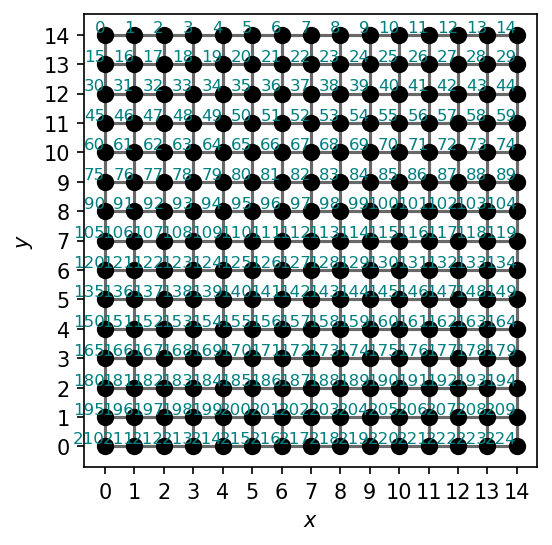

In [35]:
N = 7
lattice = SquareLattice(N, "open")

lattice.plot()
num_sites = lattice.get_num_sites()

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()

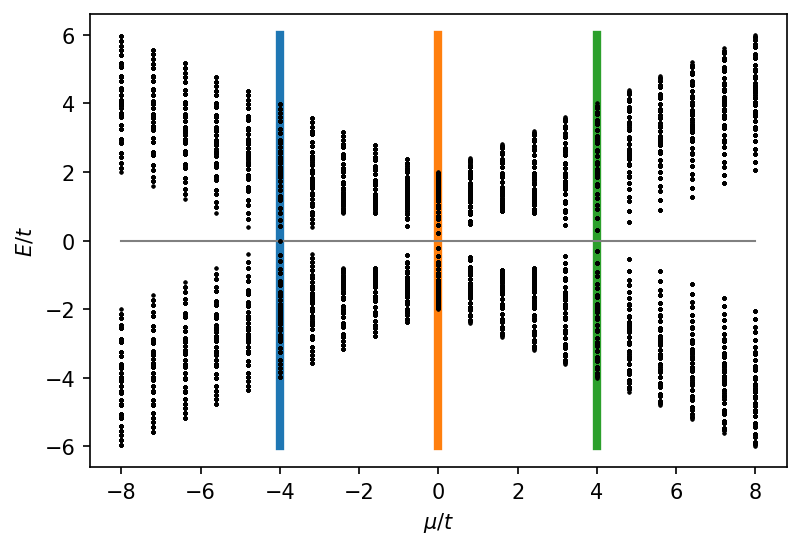

In [32]:
t = 1.0
delta = complex(t, 0.0)
num_vals = 21
mu_values = np.linspace(-8.0, 8.0, num_vals)
energies_mu = []

for mu in mu_values:
    Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
    H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
    energies, states = scipy.linalg.eigh(H_direct_lattice)

    for energy in energies:
        energies_mu.append((mu, energy))

# plt.grid(linestyle=":", zorder=0)
energy_vals = [elem[1] for elem in energies_mu]
plt.xlabel("$\mu/t$")
plt.ylabel("$E/t$")
plt.plot(
    mu_values,
    [0.0 for i in range(len(mu_values))],
    color="gray",
    linestyle="-",
    linewidth=1.0,
    zorder=10,
)
plt.plot(
    [-4 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:blue",
)
plt.plot(
    [0 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:orange",
)
plt.plot(
    [+4 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:green",
)
# plt.plot()
plt.scatter(
    [elem[0] for elem in energies_mu],
    [elem[1] for elem in energies_mu],
    s=1.0,
    zorder=100,
    color="black",
)
plt.savefig("./plots/majorana_modes_square_lattice.png", dpi=400)